### CNN-Auto encoder

**Author**: @leoapuly <br>
**Description**: An implementation of CNN auto encoder. A combination of MNIST and USPS charactor recognition datasets is used for training and testing the model.Here the last layer of Encoder is just flattened out to get the embedded representation of the input image


#### Basic stuff : Initialising seeds and importing required libraries

In [1]:
from numpy.random import seed
seed(9)
from tensorflow import set_random_seed
set_random_seed(2)
import os
os.environ['PYTHONHASHSEED'] = '0'

CUDA_VISIBLE_DEVICES=""

In [2]:
import os
os.environ["KERAS_BACKEND"] = "theano"
import keras; import keras.backend
if keras.backend.backend() != 'theano':
    raise BaseException("This script uses other backend")
else:
    keras.backend.set_image_dim_ordering('th')
    print("Backend ok")

Using Theano backend.


Backend ok


In [3]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, Input, Lambda
from keras.utils import np_utils
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.layers.advanced_activations import LeakyReLU
from keras import regularizers
from keras import backend as K
K.set_image_dim_ordering('th')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from dataset import *
from modeling import *

In [4]:
# value declarations
b_size=512
nb_classes=10
epoch=30
img_rows=16
img_cols=16
channel=1

#### Preparing MNIST and USPS dataset

Display numpy-images : MNIST 16x16 after normalisation to 0-1
(16, 16)
[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.00392157  0.12156863  0.59607846  0.44313726  0.07843138
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.03137255  0.1882353   0.61960787  0.94509804  0.90196079  0.47843137
   0.01568628  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.00392157
   0.15294118  0.47450981  0.81568629  0.95294118  0.74901962  0.8509804
   0.61960787  0.02352941  0.     

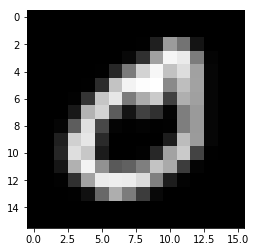

Display numpy-images : USPS 16x16 after normalisation to 0-1
(16, 16)
[[ 0.0000365   0.003178    0.0498455   0.1836895   0.27842751  0.272782
   0.262564    0.284412    0.25273049  0.208176    0.21567351  0.299867
   0.4222725   0.45699951  0.31546149  0.0886945 ]
 [ 0.000079    0.0068555   0.1089155   0.42177501  0.697604    0.74693501
   0.73790002  0.76167899  0.72753447  0.67713702  0.681669    0.74962598
   0.82360899  0.80387199  0.55534202  0.1601465 ]
 [ 0.000054    0.0047745   0.0812955   0.3908405   0.8158865   0.95978302
   0.96468198  0.96276599  0.92502999  0.87904352  0.86345249  0.85652751
   0.83722299  0.783871    0.55056202  0.164014  ]
 [ 0.0000365   0.003278    0.0598465   0.34029251  0.80466747  0.98330301
   0.98204052  0.922566    0.808608    0.67959899  0.60448402  0.53092653
   0.44464701  0.37166101  0.221719    0.059555  ]
 [ 0.0000655   0.005763    0.095676    0.4284105   0.84339702  0.98624599
   0.96179301  0.84984249  0.68738598  0.47737601  0.29939151  0

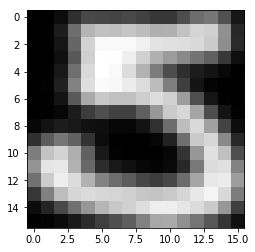

(7000, 16, 16)
(930, 16, 16)
(7000,)
(930,)


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
mnist_x_new_train, mnist_x_new_test, mnist_y_new_train, mnist_y_new_test,usps_x_new_train, usps_x_new_test, usps_y_new_train, usps_y_new_test=datasets(.1,.1)

mnist_train_y = np_utils.to_categorical(mnist_y_new_train, nb_classes)
usps_train_y = np_utils.to_categorical(usps_y_new_train, nb_classes)
mnist_test_y= np_utils.to_categorical(mnist_y_new_test, nb_classes)
usps_test_y = np_utils.to_categorical((usps_y_new_test), nb_classes)

Display numpy-images : MNIST 16x16 after normalisation to 0-1
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
(16, 16)
[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.01568628  0.09019608  0.1254902   0.10196079  0.01176471  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.02745098
   0.33333334  0.73725492  0.87058824  0.76078433  0.14117648  0.          0.
   

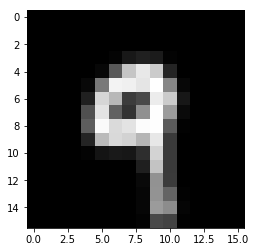

dtype('float32')

In [6]:
print('Display numpy-images : MNIST 16x16 after normalisation to 0-1')
print(mnist_train_y[1993])
display=mnist_x_new_train[1993]
print(np.shape(display))
print(display)
plt.imshow(display)
plt.gray()
plt.show()
display.dtype

Display numpy-images : USPS 16x16 after normalisation to 0-1
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
(16, 16)
[[ 0.0000155   0.0001035   0.002578    0.0381795   0.20845801  0.51905698
   0.71680748  0.76306099  0.7651695   0.76171899  0.747823    0.67526448
   0.4655385   0.197249    0.0398295   0.0023425 ]
 [ 0.0013415   0.004803    0.019875    0.14029901  0.48186851  0.82235748
   0.96072799  0.98218453  0.97035652  0.92237401  0.87472552  0.88607848
   0.78566599  0.46481499  0.123649    0.0092175 ]
 [ 0.0232755   0.0743225   0.1460945   0.35467151  0.74470949  0.95553601
   0.99589002  0.98739052  0.90996951  0.71073949  0.57646048  0.74018502
   0.87237501  0.66418248  0.248429    0.038664  ]
 [ 0.1172225   0.33499551  0.50674552  0.695553    0.91171598  0.9920485
   0.996427    0.95183098  0.76072651  0.43467751  0.26345199  0.502536
   0.84572202  0.82848251  0.47372851  0.119045  ]
 [ 0.23733699  0.64825147  0.84501749  0.92679548  0.98244947  0.99327648
   0.98179698  0.9196

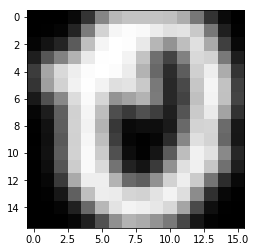

dtype('float32')

In [7]:
print('Display numpy-images : USPS 16x16 after normalisation to 0-1')
print(usps_train_y[1399])
display=usps_x_new_train[1399]
print(np.shape(display))
print(display)
plt.imshow(display)
plt.gray()
plt.show()
display.dtype

In [8]:
print(np.shape(mnist_x_new_train))
print(np.shape(usps_x_new_train))
print(np.shape(mnist_x_new_test))
print(np.shape(usps_x_new_test))

print(np.shape(mnist_train_y))
print(np.shape(usps_train_y))
print(np.shape(mnist_test_y))
print(np.shape(usps_test_y))

(63000, 16, 16)
(8368, 16, 16)
(7000, 16, 16)
(930, 16, 16)
(63000, 10)
(8368, 10)
(7000, 10)
(930, 10)


In [9]:
mnist_x_new_train = mnist_x_new_train.reshape(mnist_x_new_train.shape[0],channel,img_rows, img_cols)
mnist_x_new_test = mnist_x_new_test.reshape(mnist_x_new_test.shape[0],channel,img_rows, img_cols)
usps_x_new_test = usps_x_new_test.reshape(usps_x_new_test.shape[0],channel,img_rows, img_cols)
usps_x_new_train = usps_x_new_train.reshape(usps_x_new_train.shape[0],channel,img_rows, img_cols)

print(np.shape(mnist_x_new_train))
print(np.shape(usps_x_new_train))
print(np.shape(mnist_x_new_test))
print(np.shape(usps_x_new_test))

(63000, 1, 16, 16)
(8368, 1, 16, 16)
(7000, 1, 16, 16)
(930, 1, 16, 16)


#### Defining models, training them on shuffled data from USPS and MNIST data ( Target and source respectevely)

In [10]:
encoder=models.build_lenet(channel,img_rows, img_cols,'linear')
encoder.summary()

/home/ufaserv1_f/cnlp/transfer_learning/Github_Upload/modeling.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 16, 16..., padding="same")`
  model.add(Convolution2D(32,3,3,activation='relu',input_shape=(channel, width,height), border_mode="same"))
/home/ufaserv1_f/cnlp/transfer_learning/Github_Upload/modeling.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  model.add(Convolution2D(64,3,3, activation='relu', border_mode="same"))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 16, 16)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 8, 8)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 8, 8)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 4, 4)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 64, 4, 4)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [11]:
hidden_variable=[64,4,4]
decoder=models.build_decoder(hidden_variable[0],hidden_variable[2],hidden_variable[2])
decoder.summary()

/home/ufaserv1_f/cnlp/transfer_learning/Github_Upload/modeling.py:69: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(64, 4, 4), padding="same")`
  model_d.add(Convolution2D(64,3,3,activation='relu',input_shape=(c,w,h), border_mode="same"))
/home/ufaserv1_f/cnlp/transfer_learning/Github_Upload/modeling.py:71: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  model_d.add(Convolution2D(32,3,3, activation='relu', border_mode="same"))
/home/ufaserv1_f/cnlp/transfer_learning/Github_Upload/modeling.py:73: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), activation="sigmoid", padding="same")`
  model_d.add(Convolution2D(1,3,3, activation='sigmoid', border_mode="same"))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 4, 4)          36928     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 64, 8, 8)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 8, 8)          18464     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 16, 16)         289       
Total params: 55,681
Trainable params: 55,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Net Model
inputs_m = Input(shape=(1,16,16))
z=encoder(inputs_m)
output_m=decoder(z)
net_model=Model(inputs_m,output_m)
net_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 16, 16)         0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 64, 4, 4)          18816     
_________________________________________________________________
sequential_2 (Sequential)    (None, 1, 16, 16)         55681     
Total params: 74,497
Trainable params: 74,497
Non-trainable params: 0
_________________________________________________________________


In [13]:
import keras.backend as K
def lossfunction(y_true,y_pred):
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    return recon
   

In [14]:
net_model.compile(loss=lossfunction, optimizer='adam')

In [15]:
# Fit the model
print (np.shape(mnist_x_new_train),np.shape(usps_x_new_train))
print (np.shape(mnist_x_new_test),np.shape(usps_x_new_test))
adda_train=np.concatenate((mnist_x_new_train,usps_x_new_train),axis=0)  #  [0:8368]: for class balanced training
adda_test=np.concatenate((mnist_x_new_test,usps_x_new_test),axis=0)
from sklearn.utils import shuffle
adda_train= shuffle(adda_train, random_state=0)
adda_train= shuffle(adda_train, random_state=1)
adda_train= shuffle(adda_train, random_state=3)
print (np.shape(adda_train),np.shape(adda_test))

(63000, 1, 16, 16) (8368, 1, 16, 16)
(7000, 1, 16, 16) (930, 1, 16, 16)
(71368, 1, 16, 16) (7930, 1, 16, 16)


In [16]:
net_model.fit(adda_train, adda_train, batch_size=b_size, nb_epoch=epoch,verbose=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
71368/71368 [==============================] - 199s - loss: 0.2639   
Epoch 2/30
71368/71368 [==============================] - 183s - loss: 0.1811   
Epoch 3/30
71368/71368 [==============================] - 92s - loss: 0.1740    
Epoch 4/30
71368/71368 [==============================] - 92s - loss: 0.1707    
Epoch 5/30
71368/71368 [==============================] - 92s - loss: 0.1688    
Epoch 6/30
71368/71368 [==============================] - 93s - loss: 0.1675    
Epoch 7/30
71368/71368 [==============================] - 92s - loss: 0.1665    
Epoch 8/30
71368/71368 [==============================] - 92s - loss: 0.1657    
Epoch 9/30
71368/71368 [==============================] - 93s - loss: 0.1651    
Epoch 10/30
71368/71368 [==============================] - 93s - loss: 0.1645    
Epoch 11/30
71368/71368 [==============================] - 93s - loss: 0.1641    
Epoch 12/30
71368/71368 [==============================] - 92s - loss: 0.1636    
Epoch 13/30
71368/71368 [

#### Reconstructing the images using the trained auto encoder

In [17]:
def reconstructor():
    examples_to_show = 10
    encode_decode_ = net_model.predict(usps_x_new_test[0:24])
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(usps_x_new_test[i], (16, 16)))
        a[1][i].imshow(np.reshape(encode_decode_[i], (16, 16)))
    f.show()
    plt.draw()
    plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


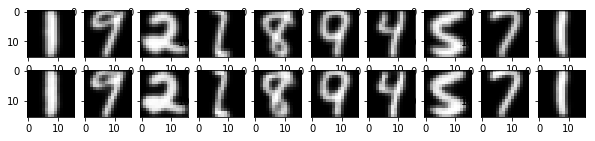

In [18]:
reconstructor()

#### Visualising the latent space and projecting the images from target and source images into the latent space

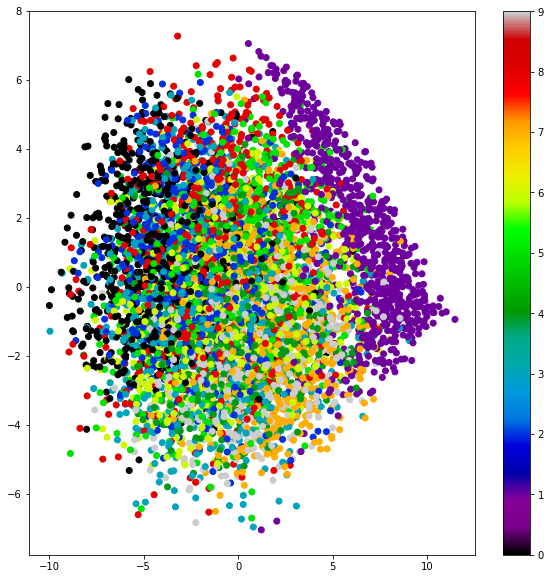

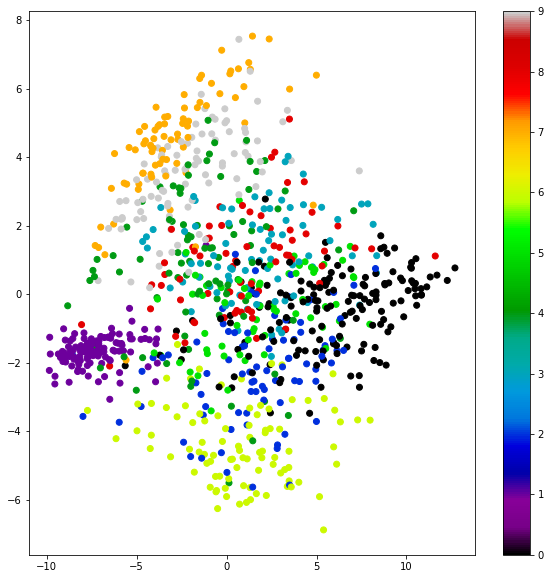

In [19]:
# 2D visualisation of features from images MNIST_test set in latent space 
latent_values_mnist = encoder.predict(mnist_x_new_test, batch_size=b_size)
latent_values_usps = encoder.predict(usps_x_new_test, batch_size=b_size)
latent_values_mnist=latent_values_mnist.reshape(latent_values_mnist.shape[0],latent_values_mnist.shape[1]*latent_values_mnist.shape[2]*latent_values_mnist.shape[3])
latent_values_usps=latent_values_usps.reshape(latent_values_usps.shape[0],latent_values_usps.shape[1]*latent_values_usps.shape[2]*latent_values_usps.shape[3])

vis_pca = PCA(n_components=2)
vis_data=vis_pca.fit_transform(latent_values_mnist)
plt.figure(figsize=(10, 10))
plt.scatter(vis_data[:, 0], vis_data[:, 1], c=mnist_y_new_test,cmap=plt.cm.nipy_spectral)
plt.colorbar()
plt.show()

# 2D visualisation of features from images USPS_test set in latent space 
vis_pca = PCA(n_components=2)
vis_data=vis_pca.fit_transform(latent_values_usps)
plt.figure(figsize=(10, 10))
plt.scatter(vis_data[:, 0], vis_data[:, 1], c=usps_y_new_test,cmap=plt.cm.nipy_spectral)
plt.colorbar()
plt.show()

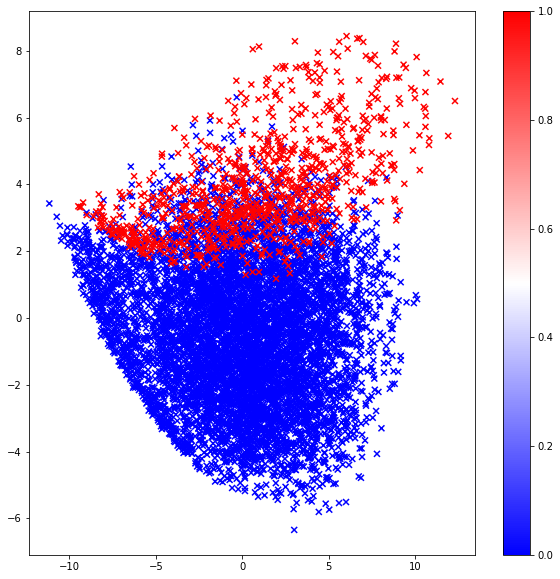

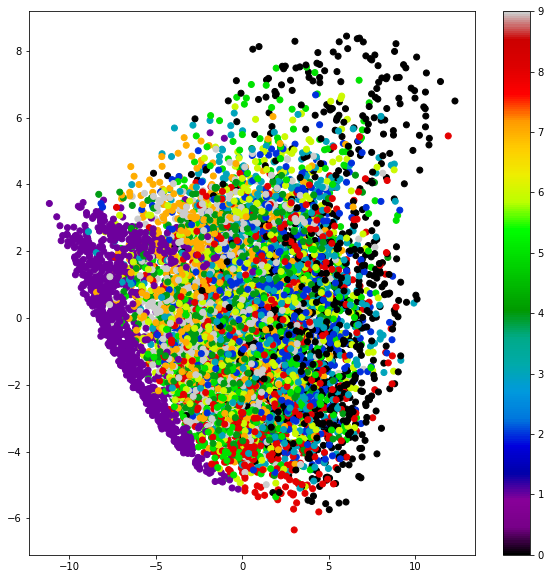

In [20]:
# 2D visualisation of features from images MNIST_test & USPS_test set in latent space 
# Red is USPS_test set & MNIST_test set
latent_values=np.concatenate((latent_values_mnist,latent_values_usps),axis=0)
labels_digits=np.concatenate((mnist_y_new_test,usps_y_new_test),axis=0)
labels_0=np.zeros(mnist_x_new_test.shape[0])
labels_1=np.ones(usps_x_new_test.shape[0])
labels=np.concatenate((labels_0,labels_1),axis=0)

vis_pca = PCA(n_components=2)
feature_vis=vis_pca.fit_transform(latent_values)

plt.figure(figsize=(10, 10))
plt.scatter(feature_vis[:, 0], feature_vis[:, 1], c=labels, marker='x', cmap=plt.cm.bwr, alpha=100)
plt.colorbar()
plt.show()

# 2D visualisation of features from images MNIST_test & USPS_test set in latent space 
plt.figure(figsize=(10, 10))
plt.scatter(feature_vis[:, 0], feature_vis[:, 1], c=labels_digits, marker='o', cmap=plt.cm.nipy_spectral, alpha=100)
plt.colorbar()
plt.show()

#### Saving models 

In [21]:
# storing model to a json file and weights in HDF5 format
model_json = encoder.to_json()
# saving model
with open("cnn_exp1_ae_encoder.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5 and saving it
encoder.save_weights("cnn_exp1_ae_encoder.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
# storing model to a json file and weights in HDF5 format
model_json = decoder.to_json()
# saving model
with open("cnn_exp1_ae_decoder.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5 and saving it
decoder.save_weights("cnn_exp1_ae_decoder.h5")
print("Saved model to disk")

Saved model to disk
